In [1]:
# Train_Data : 2000(1000 dogs, 1000 cats)
# Valid_Data : 1000(500 dogs, 500 cats)
# Test_Data : 1000(500 dogs, 500 cats)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [4]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Thu Sep 30 06:49:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    71W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [5]:
# 1. Google Drive Mount

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar 31  2021 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [11]:
# 2. Data Preprocessing

!unzip '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [12]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 06:50 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 06:52 test
drwxr-xr-x 4 root root 4096 Sep 30 06:52 train
drwxr-xr-x 4 root root 4096 Sep 30 06:52 validation


In [13]:
# train_dir
# valid_dir
# test_dir

train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [14]:
# Normalization -> ImageDataGenerator()
# Resizing & Generator -> flow_from_directory()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [20]:
labels_batch

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1.], dtype=float32)

In [21]:
# 3. CNN Keras Modeling

# Feature Extraction & Classification

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [24]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 44s 114ms/step - loss: 0.7072 - accuracy: 0.5115 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 11s 111ms/step - loss: 0.6917 - accuracy: 0.5155 - val_loss: 0.6860 - val_accuracy: 0.5010
Epoch 3/60
100/100 [==============================] - 11s 110ms/step - loss: 0.6746 - accuracy: 0.5635 - val_loss: 0.6591 - val_accuracy: 0.5990
Epoch 4/60
100/100 [==============================] - 11s 110ms/step - loss: 0.6495 - accuracy: 0.6000 - val_loss: 0.6429 - val_accuracy: 0.5890
Epoch 5/60
100/100 [==============================] - 11s 111ms/step - loss: 0.6497 - accuracy: 0.6030 - val_loss: 0.6750 - val_accuracy: 0.5230
Epoch 6/60
100/100 [==============================] - 11s 113ms/step - loss: 0.6666 - accuracy: 0.5770 - val_loss: 0.6747 - val_accuracy: 0.5780
Epoch 7/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6180 - accuracy: 0.6520 - val_loss: 0.6357 - val_ac

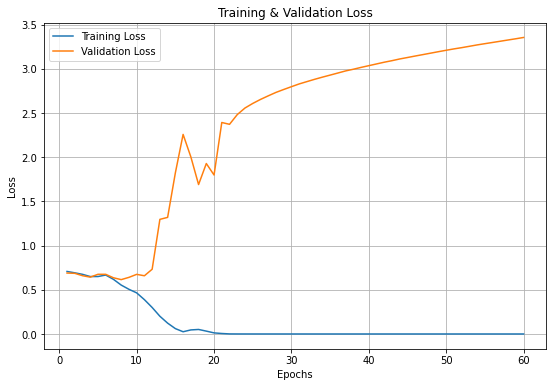

In [25]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

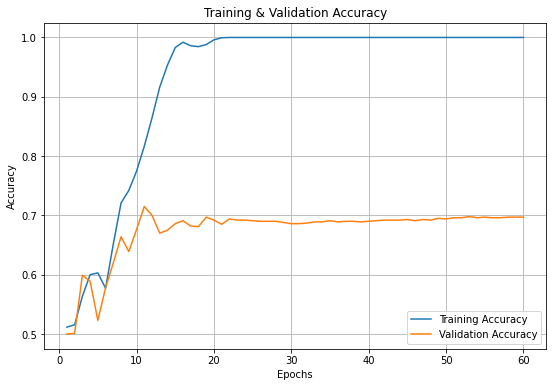

In [26]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150,150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [30]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 67ms/step - loss: 3.7112 - accuracy: 0.6840
Loss = 3.71116
Accuracy = 0.68400


In [31]:
# 5. Model Save & Load to Google Drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [33]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 175728
-rw------- 1 root root     34600 Sep 28 08:01 001_Model_iris.h5
-rw------- 1 root root 179909880 Sep 30 07:19 002_dogs_and_cats_small.h5


In [34]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [37]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 68ms/step - loss: 3.7112 - accuracy: 0.6840
Loss = 3.71116
Accuracy = 0.68400
